In [ ]:
from google.colab import files
uploaded = files.upload()


Saving meghalaya_gsva.csv to meghalaya_gsva.csv


In [ ]:
import pandas as pd

# Load uploaded CSV file
df_raw = pd.read_csv('meghalaya_gsva.csv')

# Melt wide format to long format
df_long = df_raw.melt(id_vars="Item", var_name="Year", value_name="Value")

# Clean year values
df_long["Year"] = df_long["Year"].str[:4].astype(int)

# Separate population and total GSVA
population_df = df_long[df_long["Item"] == "Population ('00)"].copy()
gsva_df = df_long[df_long["Item"] == "TOTAL GSVA at basic prices"].copy()

# Exclude population and GSVA from main sectoral data
df_main = df_long[~df_long["Item"].isin(["TOTAL GSVA at basic prices", "Population ('00)"])].copy()

# Merge total GSVA and population back to compute shares
df_main = df_main.merge(gsva_df.rename(columns={"Value": "Total_GSVA"}).drop(columns="Item"), on="Year")
df_main = df_main.merge(population_df.rename(columns={"Value": "Population"}).drop(columns="Item"), on="Year")

# Calculate sector's share in GSVA and per capita values
df_main["GSVA_Share_Percent"] = (df_main["Value"] / df_main["Total_GSVA"]) * 100
df_main["Per_Capita_GSVA"] = df_main["Value"] / (df_main["Population"] * 100)

# Show sample output
df_main.head()


,Item,Year,Value,Total_GSVA,Population,GSVA_Share_Percent,Per_Capita_GSVA
0,"Agriculture, forestry and fishing",2011,282868.0,1892182.0,30150.0,14.949302,0.093820
1,Crops,2011,163103.0,1892182.0,30150.0,8.619837,0.054097
2,Livestock,2011,59593.0,1892182.0,30150.0,3.149433,0.019766
3,Forestry and logging,2011,56090.0,1892182.0,30150.0,2.964303,0.018604
4,Fishing and aquaculture,2011,4082.0,1892182.0,30150.0,0.215730,0.001354


In [ ]:
import pandas as pd

# Read the CSV file
df_raw = pd.read_csv("meghalaya_gsva.csv")

# Melt to long format
df_long = df_raw.melt(id_vars="Item", var_name="Year", value_name="Value")

# Extract year as integer from '2011-12' format → 2011
df_long["Year"] = df_long["Year"].str[:4].astype(int)

# Extract population and total GSVA
population_df = df_long[df_long["Item"] == "Population ('00)"].copy()
gsva_df = df_long[df_long["Item"] == "TOTAL GSVA at basic prices"].copy()

# Sectoral data (exclude total GSVA & population)
df_main = df_long[~df_long["Item"].isin(["TOTAL GSVA at basic prices", "Population ('00)"])].copy()

# Merge population and total GSVA with sectoral data
df_main = df_main.merge(gsva_df.rename(columns={"Value": "Total_GSVA"}).drop(columns="Item"), on="Year")
df_main = df_main.merge(population_df.rename(columns={"Value": "Population"}).drop(columns="Item"), on="Year")

# Convert population to actual number (multiply by 100)
df_main["Population"] = df_main["Population"] * 100

# Calculate % contribution of each sector to GSVA
df_main["GSVA_Share_Percent"] = (df_main["Value"] / df_main["Total_GSVA"]) * 100

# Calculate Per Capita GSVA for each sector (₹)
# Value is in Lakhs → multiply by 1e5 to get Rupees
df_main["Per_Capita_GSVA"] = (df_main["Value"] * 1e5) / df_main["Population"]

# Preview the processed dataset
df_main.head()


,Item,Year,Value,Total_GSVA,Population,GSVA_Share_Percent,Per_Capita_GSVA
0,"Agriculture, forestry and fishing",2011,282868.0,1892182.0,3015000.0,14.949302,9382.023217
1,Crops,2011,163103.0,1892182.0,3015000.0,8.619837,5409.718076
2,Livestock,2011,59593.0,1892182.0,3015000.0,3.149433,1976.550580
3,Forestry and logging,2011,56090.0,1892182.0,3015000.0,2.964303,1860.364842
4,Fishing and aquaculture,2011,4082.0,1892182.0,3015000.0,0.215730,135.389718


In [ ]:
# Save to CSV
df_main.to_csv("Cleaned_Meghalaya_GSVA.csv", index=False)

# Download file
#files.download("Cleaned_Meghalaya_GSVA.csv")

df_main.head()

,Item,Year,Value,Total_GSVA,Population,GSVA_Share_Percent,Per_Capita_GSVA
0,"Agriculture, forestry and fishing",2011,282868.0,1892182.0,3015000.0,14.949302,9382.023217
1,Crops,2011,163103.0,1892182.0,3015000.0,8.619837,5409.718076
2,Livestock,2011,59593.0,1892182.0,3015000.0,3.149433,1976.550580
3,Forestry and logging,2011,56090.0,1892182.0,3015000.0,2.964303,1860.364842
4,Fishing and aquaculture,2011,4082.0,1892182.0,3015000.0,0.215730,135.389718


In [ ]:
files.download("Cleaned_Meghalaya_GSVA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load CSV
df_raw = pd.read_csv("meghalaya_gsva.csv")

# Reshape to long format
df_long = df_raw.melt(id_vars="Item", var_name="Year", value_name="Value")
df_long["Year"] = df_long["Year"].str[:4].astype(int)


In [ ]:
# Extract total GSVA and population
gsva_df = df_long[df_long["Item"] == "TOTAL GSVA at basic prices"].copy()
population_df = df_long[df_long["Item"] == "Population ('00)"].copy()

# Drop them from main dataset
df_main = df_long[~df_long["Item"].isin(["TOTAL GSVA at basic prices", "Population ('00)"])].copy()

# Merge population and GSVA with main
df_main = df_main.merge(gsva_df.rename(columns={"Value": "Total_GSVA"}).drop(columns="Item"), on="Year")
df_main = df_main.merge(population_df.rename(columns={"Value": "Population"}).drop(columns="Item"), on="Year")

# Convert population to absolute number (x100)
df_main["Population"] *= 100


In [ ]:
# Calculate GSVA share (% of total)
df_main["GSVA_Share_Percent"] = (df_main["Value"] / df_main["Total_GSVA"]) * 100

# General per capita GSVA (not sector adjusted)
df_main["Per_Capita_GSVA"] = (df_main["Value"] * 1e5) / df_main["Population"]  # Convert lakhs to rupees

# Categorize sectors
def categorize_sector(item):
    if item in [
        'Agriculture, forestry and fishing', 'Crops', 'Livestock',
        'Forestry and logging', 'Fishing and aquaculture', 'Mining and quarrying'
    ]:
        return 'Primary'
    elif item in [
        'Manufacturing', 'Electricity, gas, water supply & other utility services', 'Construction'
    ]:
        return 'Secondary'
    elif item in [
        'Trade, repair, hotels and restaurants', 'Trade & repair services', 'Hotels & restaurants',
        'Transport, storage, communication & services related to broadcasting', 'Road transport', 'Air transport',
        'Storage', 'Communication & services related to broadcasting', 'Financial services',
        'Real estate, ownership of dwelling & professional services', 'Public administration', 'Other services'
    ]:
        return 'Tertiary'
    else:
        return 'Other'

df_main["Sector_Group"] = df_main["Item"].apply(categorize_sector)

# Sectoral workforce shares
sector_population_share = {
    'Primary': 0.60,
    'Secondary': 0.15,
    'Tertiary': 0.25
}

# Sector-specific per capita GSVA (adjusted by sector workforce)
def get_adjusted_pc_income(row):
    share = sector_population_share.get(row["Sector_Group"], None)
    if share is None or share == 0:
        return None
    return (row["Value"] * 1e5) / (row["Population"] * share)

df_main["Per_Capita_GSVA_Sector_Adjusted"] = df_main.apply(get_adjusted_pc_income, axis=1)


In [ ]:
# Save output
df_main.to_csv("Cleaned_Meghalaya_GSVA_Adjusted.csv", index=False)
files.download("Cleaned_Meghalaya_GSVA_Adjusted.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

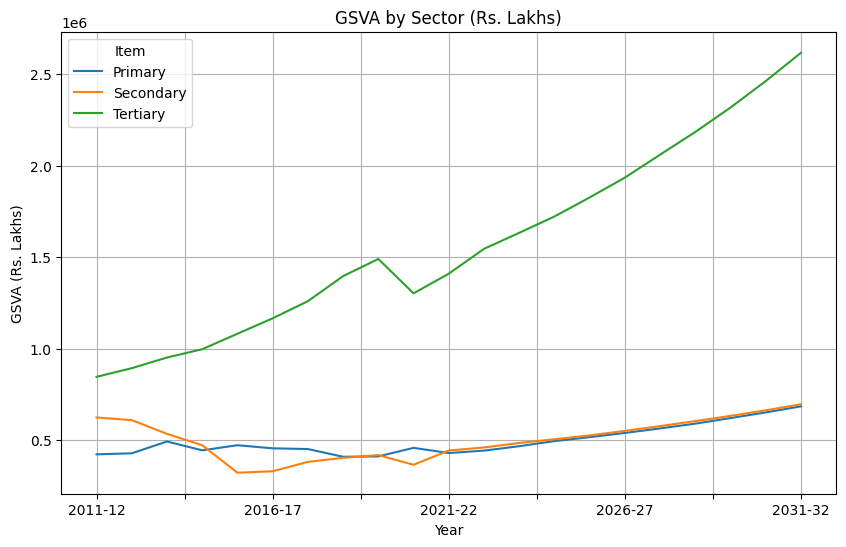

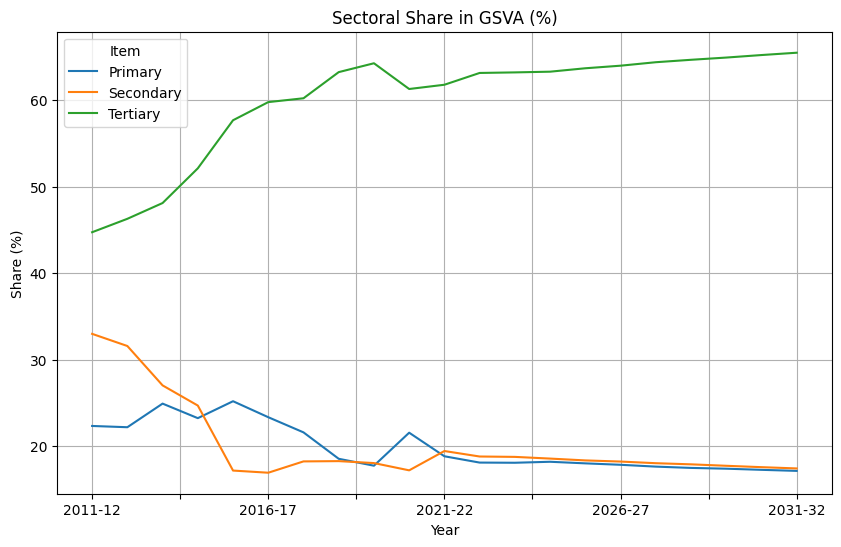

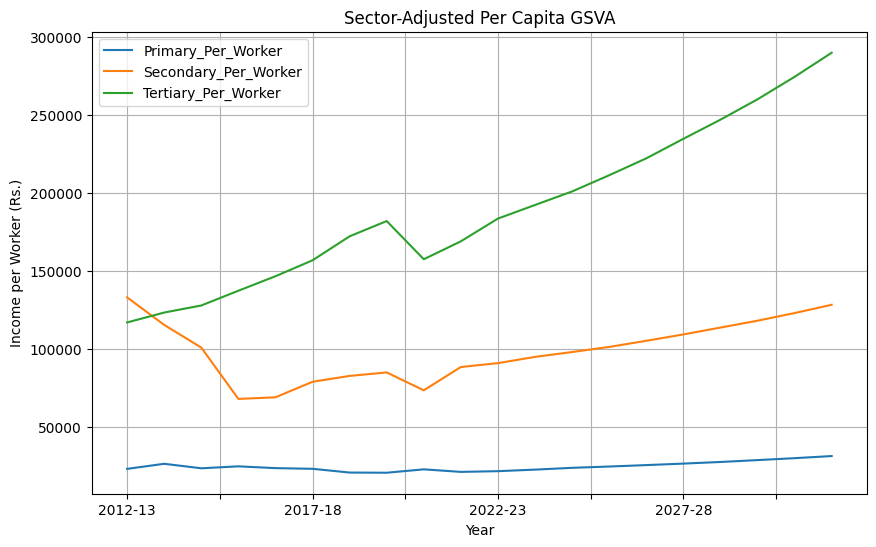

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = '/content/meghalaya_gsva.csv'  # Update if the path is different
df = pd.read_csv(file_path)

# Clean and reshape
df = df.rename(columns=lambda x: x.strip())
df_melted = df.melt(id_vars=['Item'], var_name='Year', value_name='Value')
df_melted['Year'] = df_melted['Year'].str.extract(r'(\d{4}-\d{2})')[0]
df_melted.dropna(inplace=True)

# Convert values to numeric
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')
df_melted.dropna(inplace=True)

# Pivot for sector-wise analysis
df_pivot = df_melted.pivot(index='Year', columns='Item', values='Value')
df_pivot = df_pivot.fillna(0)

# Define sector groups
primary = ['Agriculture, forestry and fishing', 'Mining and quarrying']
secondary = ['Manufacturing', 'Electricity, gas, water supply & other utility services', 'Construction']
tertiary = [
    'Trade, repair, hotels and restaurants',
    'Transport, storage, communication & services related to broadcasting',
    'Financial services',
    'Real estate, ownership of dwelling & professional services',
    'Public administration',
    'Other services'
]

# Calculate sector totals
df_pivot['Primary'] = df_pivot[primary].sum(axis=1)
df_pivot['Secondary'] = df_pivot[secondary].sum(axis=1)
df_pivot['Tertiary'] = df_pivot[tertiary].sum(axis=1)

# Total GSVA
df_pivot['Total_GSVA'] = df_pivot['Primary'] + df_pivot['Secondary'] + df_pivot['Tertiary']

# Sector share over time
df_share = df_pivot[['Primary', 'Secondary', 'Tertiary']].div(df_pivot['Total_GSVA'], axis=0) * 100

# Plot GSVA trends
df_pivot[['Primary', 'Secondary', 'Tertiary']].plot(figsize=(10, 6), title="GSVA by Sector (Rs. Lakhs)")
plt.ylabel("GSVA (Rs. Lakhs)")
plt.grid(True)
plt.show()

# Plot sectoral share trends
df_share.plot(figsize=(10, 6), title="Sectoral Share in GSVA (%)")
plt.ylabel("Share (%)")
plt.grid(True)
plt.show()

# Per capita income (using Population ('00'))
population_row = df[df['Item'].str.contains("Population", case=False)].drop(columns=['Item']).T
population_row.columns = ['Population_00']
population_row.index.name = 'Year'
population_row = population_row.astype(float)
population_row['Population'] = population_row['Population_00'] * 100

# Merge with GSVA
df_pivot = df_pivot.merge(population_row[['Population']], left_index=True, right_index=True)

# Calculate per capita GSVA
df_pivot['Per_Capita_GSVA'] = df_pivot['Total_GSVA'] * 1e5 / df_pivot['Population']  # Convert lakhs to rupees

# Adjusted per capita income based on workforce split
workforce_dist = {'Primary': 0.60, 'Secondary': 0.15, 'Tertiary': 0.25}
for sector in ['Primary', 'Secondary', 'Tertiary']:
    df_pivot[f'{sector}_Per_Worker'] = df_pivot[sector] * 1e5 / (df_pivot['Population'] * workforce_dist[sector])

# Plot adjusted per capita income
df_pivot[['Primary_Per_Worker', 'Secondary_Per_Worker', 'Tertiary_Per_Worker']].plot(figsize=(10, 6), title='Sector-Adjusted Per Capita GSVA')
plt.ylabel("Income per Worker (Rs.)")
plt.grid(True)
plt.show()


In [ ]:
!pip install pymc arviz --quiet


📊 Load and preprocess your dataset

In [ ]:
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/meghalaya_gsva.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Set 'Item' as index
df.set_index('Item', inplace=True)

# Transpose so years become rows
df = df.transpose().reset_index()
df.rename(columns={'index': 'Year'}, inplace=True)

# Convert year to numeric (remove any non-numeric characters if needed)
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(int)

# Extract relevant variables
X = df[['Agriculture, forestry and fishing',
        'Mining and quarrying',
        'Manufacturing',
        'Construction',
        'Trade, repair, hotels and restaurants',
        'Transport, storage, communication & services related to broadcasting',
        'Public administration',
        'Other services']].astype(float)

y = df['Gross State Domestic Product'].astype(float)


Bayesian Linear Regression Model

In [ ]:
import numpy as np

# Standardize the variables
X_standardized = (X - X.mean()) / X.std()
y_standardized = (y - y.mean()) / y.std()

# Build the model
with pm.Model() as model:
    # Priors for coefficients
    intercept = pm.Normal("Intercept", mu=0, sigma=1)
    coefficients = pm.Normal("Beta", mu=0, sigma=1, shape=X_standardized.shape[1])

    # Expected value
    mu = intercept + pm.math.dot(X_standardized, coefficients)

    # Likelihood
    sigma = pm.HalfNormal("Sigma", sigma=1)
    y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=y_standardized)

    # Sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.95)


Output()

Here are some visualization codes to help you analyze the results of your Bayesian linear regression model:

1. Trace Plots (to check convergence)

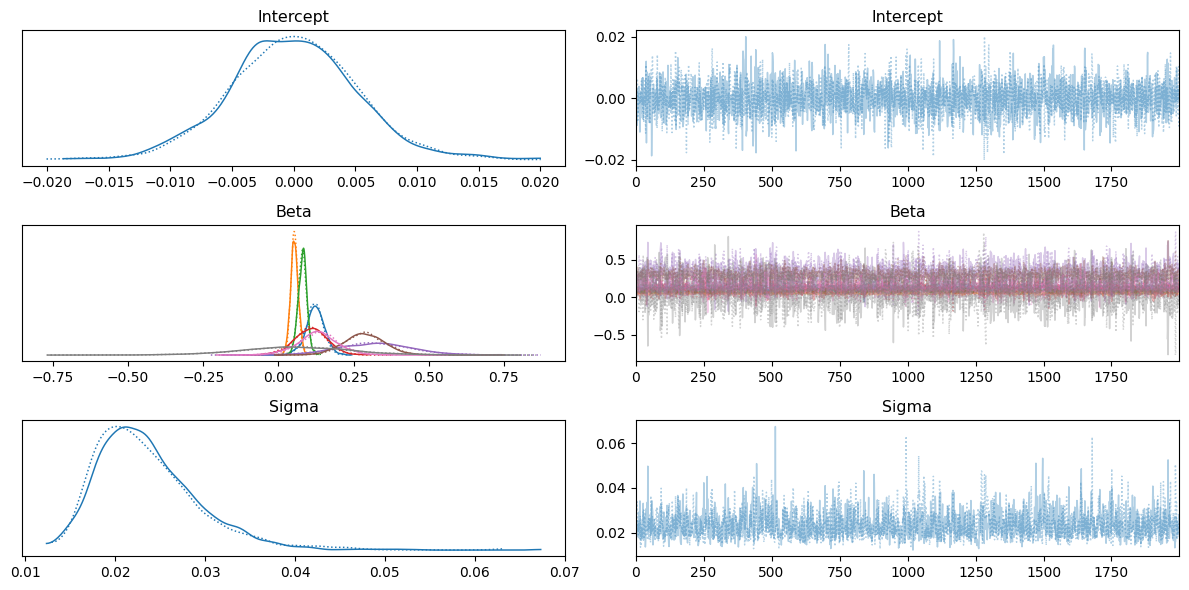

In [ ]:
az.plot_trace(trace, var_names=["Intercept", "Beta", "Sigma"])
plt.tight_layout()
plt.show()

2. Posterior Distributions of Coefficients

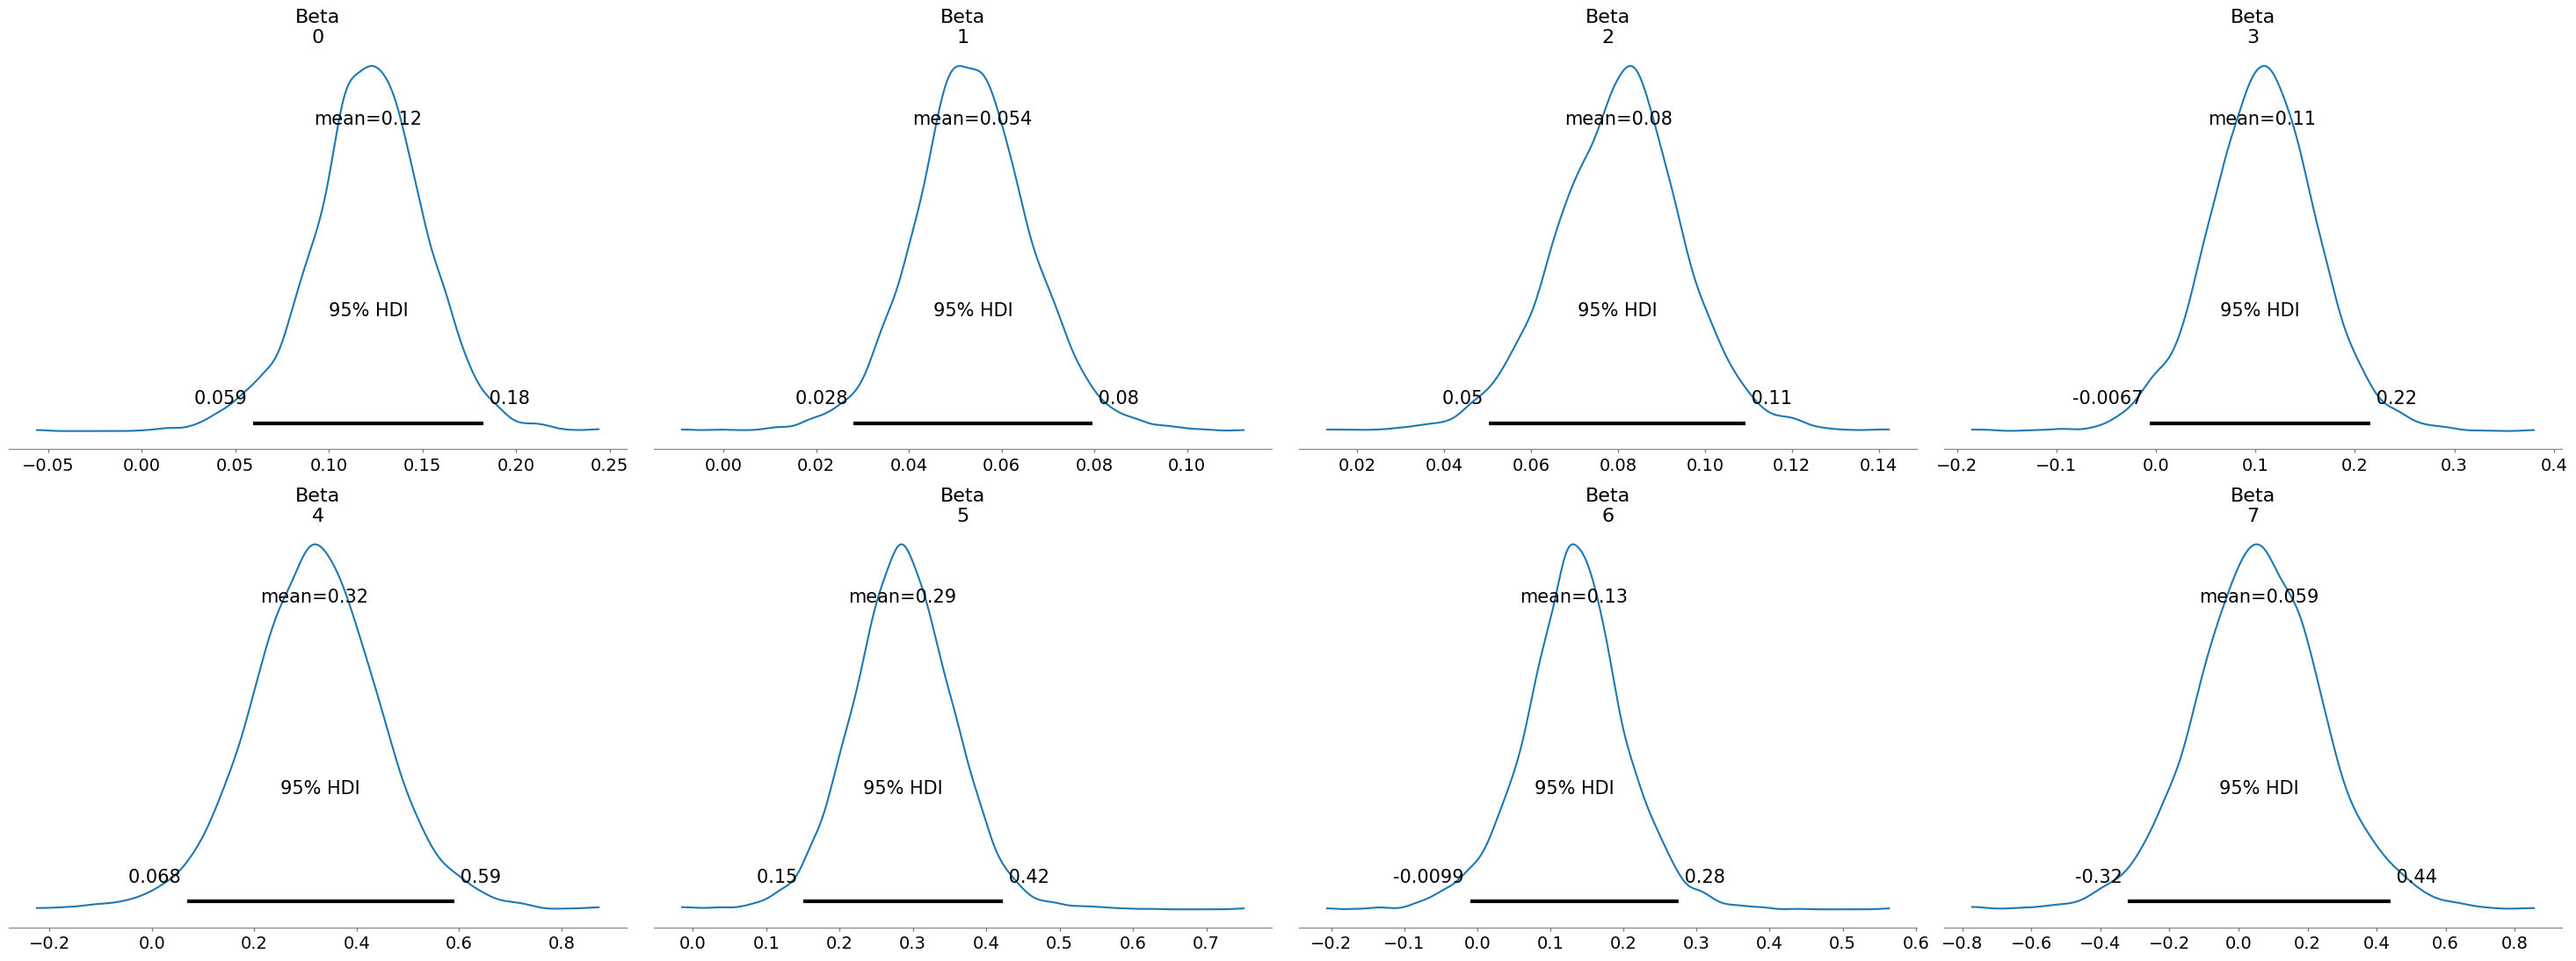

In [ ]:
az.plot_posterior(trace, var_names=["Beta"], hdi_prob=0.95)
plt.tight_layout()
plt.show()

3. Forest Plot (to compare coefficients)

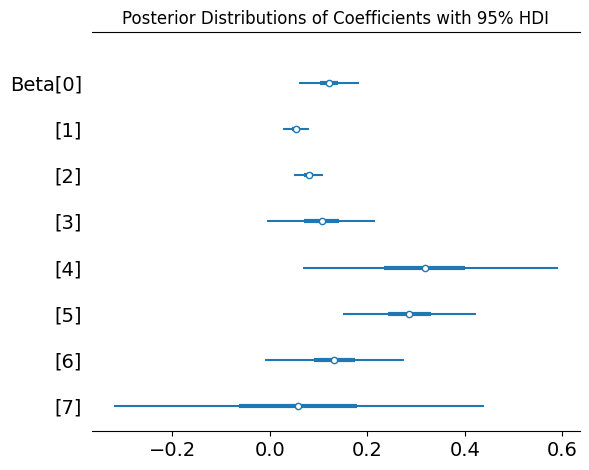

In [ ]:
az.plot_forest(trace, var_names=["Beta"], combined=True, hdi_prob=0.95)
plt.title("Posterior Distributions of Coefficients with 95% HDI")
plt.tight_layout()
plt.show()

📈 Posterior Analysis

4. Pair Plot (to check correlations between parameters)

In [ ]:
az.plot_pair(trace, var_names=["Beta"], kind='kde', marginals=True)
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

6. Plotting Observed vs Predicted Values

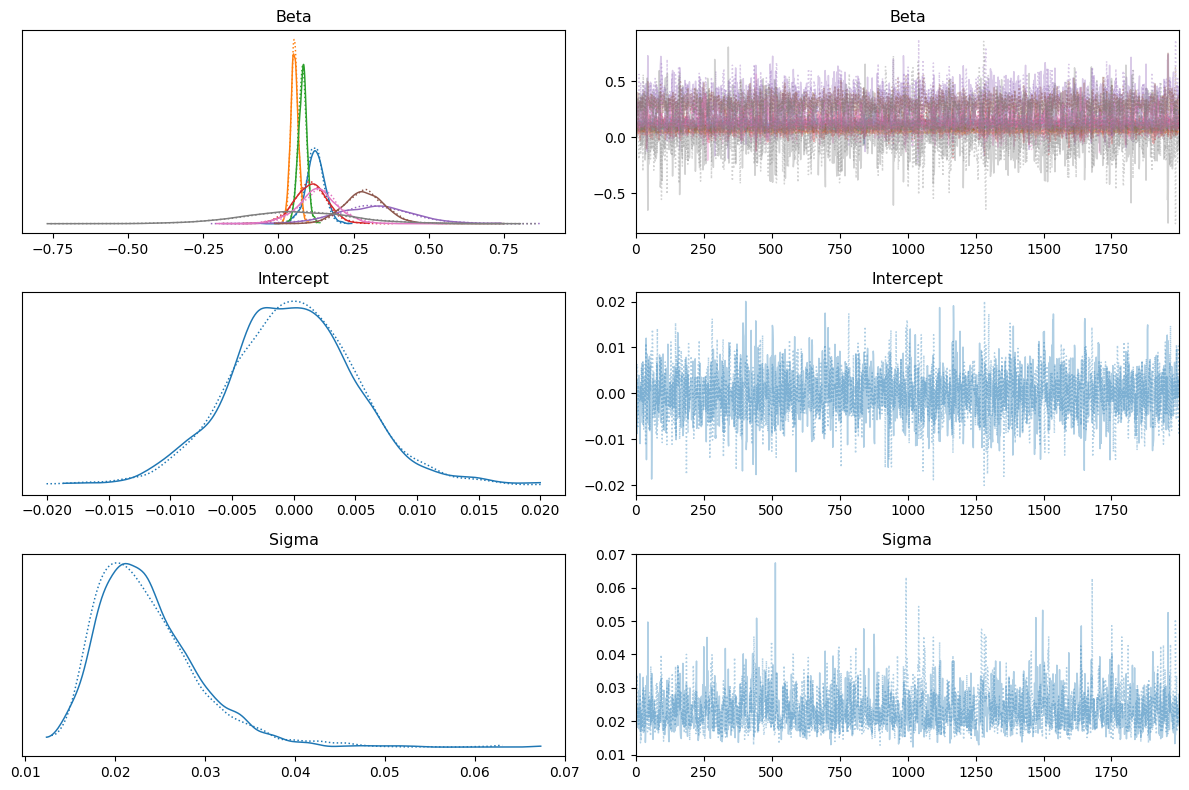

In [ ]:
import arviz as az
import matplotlib.pyplot as plt

# Assuming your MCMC sampling result is stored in `trace`
# trace = pm.sample(...)  # Already done earlier in your workflow

# Plot trace for all variables
az.plot_trace(trace, figsize=(12, 8))
plt.tight_layout()
plt.show()


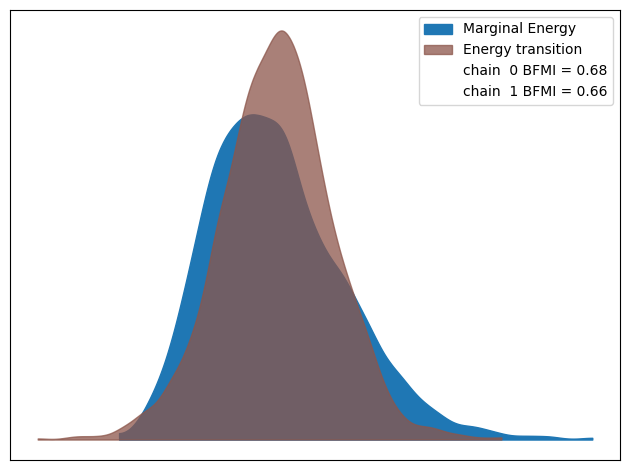

In [ ]:
az.plot_energy(trace)
plt.tight_layout()
plt.show()

ValueError: shapes (21,8) and (4000,8) not aligned: 8 (dim 1) != 4000 (dim 0)

In [ ]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression().fit(X_standardized, y_standardized)
print("OLS Coefficients:", ols.coef_)


OLS Coefficients: [0.12143977 0.05382884 0.08061711 0.10911305 0.3226051  0.28522689
 0.13342088 0.05043449]


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

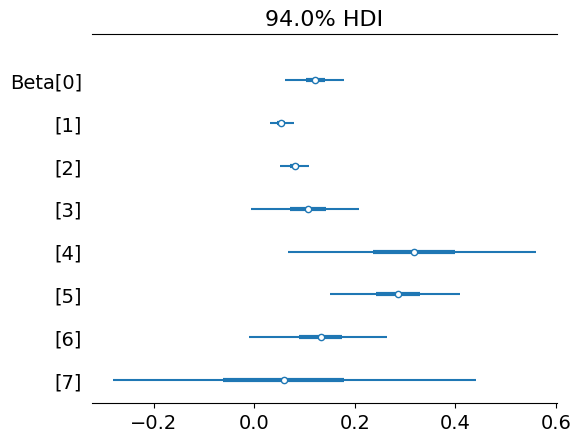

In [ ]:
az.plot_forest(trace, var_names=["Beta"], combined=True)


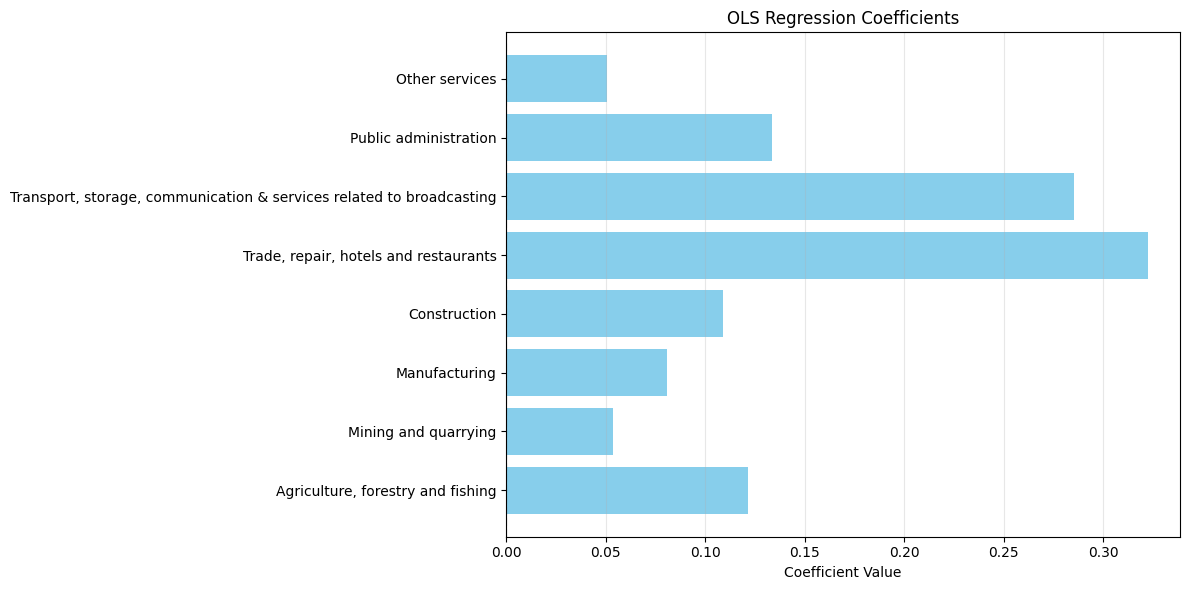

In [ ]:
# Get OLS coefficients
ols_coef = ols.coef_
features = X.columns

# Plot OLS coefficients
plt.figure(figsize=(12, 6))
plt.barh(features, ols_coef, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('OLS Regression Coefficients')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

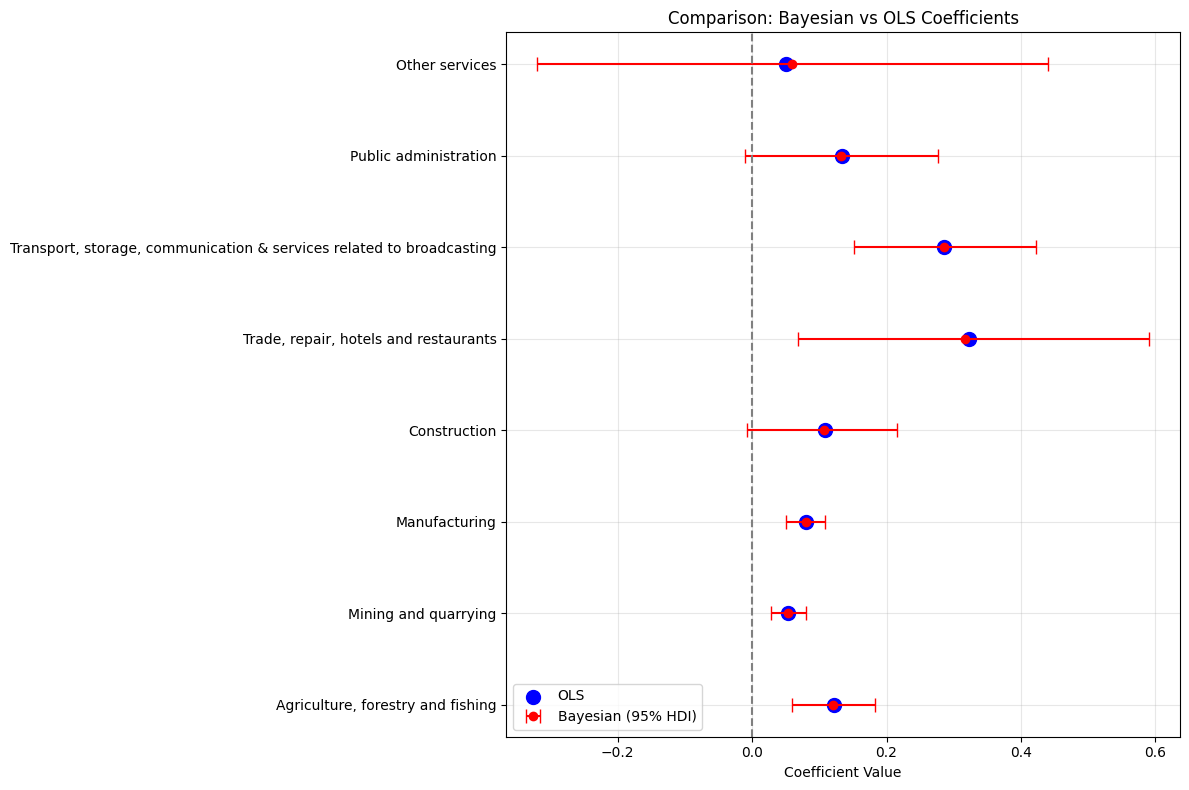

In [ ]:
# Get Bayesian posterior summary
bayes_summary = az.summary(trace, var_names=["Beta"], hdi_prob=0.95)
bayes_means = bayes_summary['mean'].values

# Create comparison plot
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(features))

# Plot Bayesian results
plt.errorbar(bayes_means, y_pos,
             xerr=[bayes_means - bayes_summary['hdi_2.5%'],
                   bayes_summary['hdi_97.5%'] - bayes_means],
             fmt='o', color='red', capsize=5, label='Bayesian (95% HDI)')

# Plot OLS results
plt.scatter(ols_coef, y_pos, color='blue', s=100, label='OLS')

plt.yticks(y_pos, features)
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Coefficient Value')
plt.title('Comparison: Bayesian vs OLS Coefficients')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

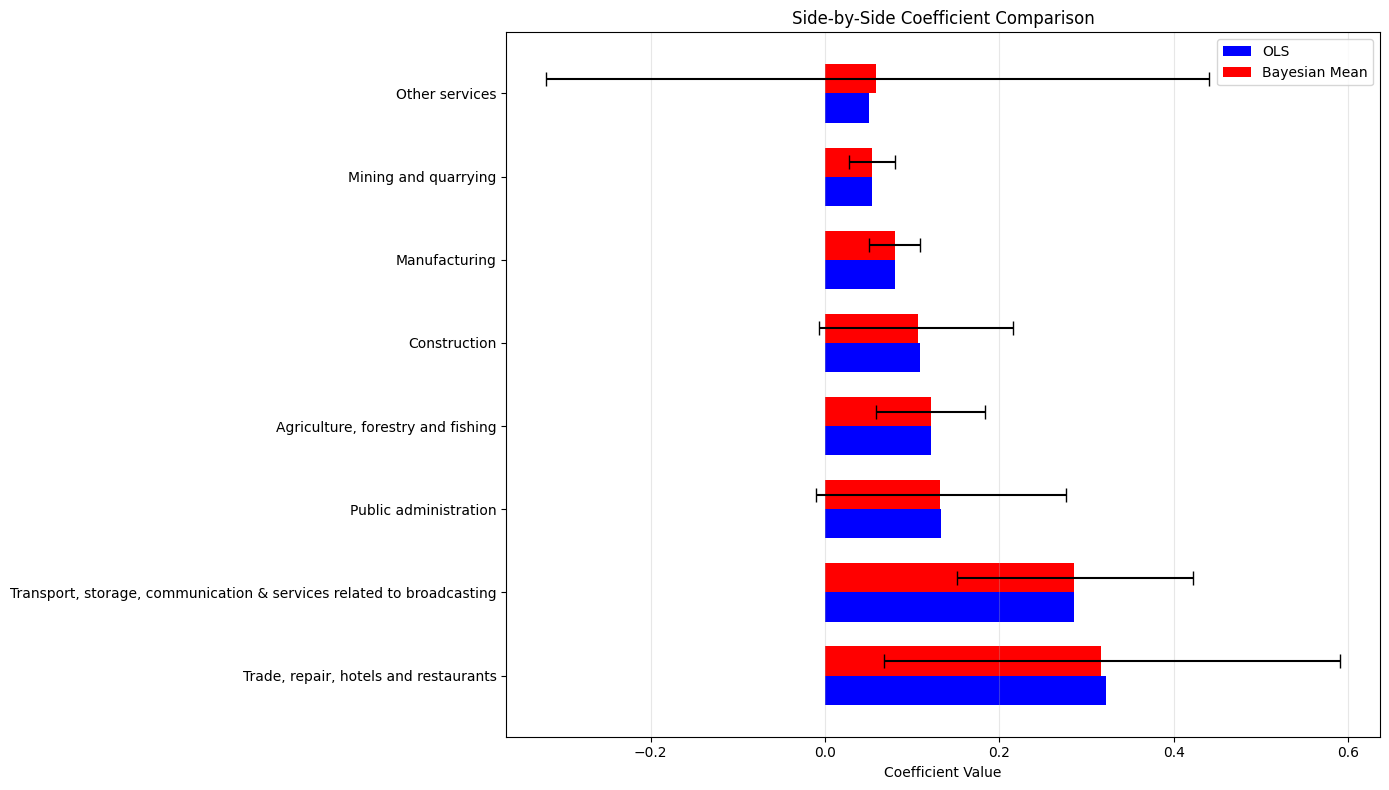

In [ ]:
# Create dataframe for comparison
coef_comparison = pd.DataFrame({
    'Feature': features,
    'OLS': ols_coef,
    'Bayesian_Mean': bayes_means,
    'Bayesian_Lower': bayes_summary['hdi_2.5%'],
    'Bayesian_Upper': bayes_summary['hdi_97.5%']
})

# Sort by absolute OLS coefficient
coef_comparison = coef_comparison.iloc[(-np.abs(coef_comparison['OLS'])).argsort()]

# Plot
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(coef_comparison))

plt.barh(index - bar_width/2, coef_comparison['OLS'],
        height=bar_width, color='blue', label='OLS')
plt.barh(index + bar_width/2, coef_comparison['Bayesian_Mean'],
        height=bar_width, color='red', label='Bayesian Mean')
plt.errorbar(coef_comparison['Bayesian_Mean'], index + bar_width/2,
            xerr=[coef_comparison['Bayesian_Mean'] - coef_comparison['Bayesian_Lower'],
                  coef_comparison['Bayesian_Upper'] - coef_comparison['Bayesian_Mean']],
            fmt='none', color='black', capsize=5)

plt.yticks(index, coef_comparison['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Side-by-Side Coefficient Comparison')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print("Coefficient Comparison Table:")
print(coef_comparison.set_index('Feature').round(4))

Coefficient Comparison Table:
                                                       OLS  Bayesian_Mean  \
Feature                                                                     
Trade, repair, hotels and restaurants               0.3226          0.317   
Transport, storage, communication & services re...  0.2852          0.286   
Public administration                               0.1334          0.132   
Agriculture, forestry and fishing                   0.1214          0.121   
Construction                                        0.1091          0.107   
Manufacturing                                       0.0806          0.080   
Mining and quarrying                                0.0538          0.054   
Other services                                      0.0504          0.059   

                                                    Bayesian_Lower  \
Feature                                                              
Trade, repair, hotels and restaurants                      

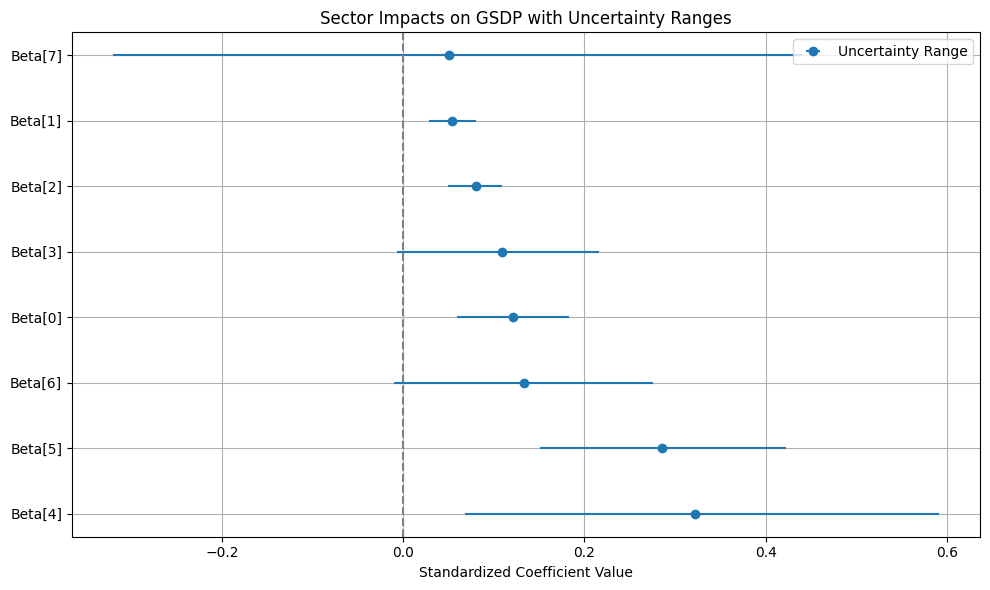

In [ ]:
plt.figure(figsize=(10,6))
plt.errorbar(coef_comparison['OLS'], coef_comparison.index,
             xerr=[coef_comparison['OLS']-coef_comparison['Bayesian_Lower'],
                   coef_comparison['Bayesian_Upper']-coef_comparison['OLS']],
             fmt='o', label='Uncertainty Range')
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel('Standardized Coefficient Value')
plt.title('Sector Impacts on GSDP with Uncertainty Ranges')
plt.grid(True)
plt.legend()
plt.tight_layout()